### Import Library

In [8]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Import Data

In [9]:
tuning = pd.read_csv('hasiltuning.csv')
tuning

,hidden_layer,hidden_neuron,aktivasi,lr,epoch,mse,bobot,bias,bobot_output,bias_output
0,1,"(2,)",relu,0.00001,100,0.003616,"[[[np.float64(0.10699418429729088), np.float64...","[[0.572809207821098, np.float64(-0.01365306829...","[np.float64(0.6234574260724818), np.float64(0....",0.059012
1,1,"(2,)",relu,0.00001,200,0.021683,"[[[np.float64(-0.13980825343409117), np.float6...","[[0.27418607228555925, np.float64(-0.440165911...","[np.float64(0.8626237422754499), np.float64(0....",0.803570
2,1,"(2,)",relu,0.00010,100,0.006859,"[[[np.float64(-0.3377971785796175), np.float64...","[[0.7100748314478269, np.float64(-0.7321976046...","[np.float64(0.5310673728570456), np.float64(0....",0.331533
3,1,"(2,)",relu,0.00010,200,0.010269,"[[[np.float64(0.40518274425828454), np.float64...","[[0.3153681780340243, np.float64(-0.4282997955...","[np.float64(0.18454241556813414), np.float64(0...",0.652523
4,1,"(2,)",relu,0.00100,100,0.081554,"[[[np.float64(-3.7256119299037502), np.float64...","[[0.6035591159166552, np.float64(-2.0137836647...","[np.float64(0.7919511051997543), np.float64(0....",0.439488
...,...,...,...,...,...,...,...,...,...,...
283,2,"(4, 4)",tanh,0.00001,200,0.083203,"[[[np.float64(0.2826365466464155), np.float64(...","[[0.9113737427963798, 0.973856609016062, 0.637...","[np.float64(0.9915155316629379), np.float64(0....",0.537151
284,2,"(4, 4)",tanh,0.00010,100,0.013800,"[[[np.float64(0.1985110682361901), np.float64(...","[[0.7774285706745424, 0.7164500242489753, 0.79...","[np.float64(0.5044970953156604), np.float64(0....",0.845093
285,2,"(4, 4)",tanh,0.00010,200,0.012734,"[[[np.float64(-0.008355418518446327), np.float...","[[0.4309213539541634, 0.6873961104254199, 0.42...","[np.float64(0.1577739035273022), np.float64(0....",0.769307
286,2,"(4, 4)",tanh,0.00100,100,0.014646,"[[[np.float64(0.4972485929988115), np.float64(...","[[0.5810752836706177, 0.3503533507632055, 0.46...","[np.float64(0.2463835693924553), np.float64(0....",0.456962


In [10]:
X_test = pd.read_csv('dataset/X_test.csv').values
X_test

array([[0.72924046, 0.78047824, 0.77438659, 0.37263913],
       [0.66017316, 0.5876127 , 0.6888091 , 0.28629199],
       [0.50314837, 0.29086633, 0.48473968, 0.06663297],
       ...,
       [0.75816608, 0.77224618, 0.77558348, 0.45094435],
       [0.5733963 , 0.4880439 , 0.76181927, 0.37314462],
       [0.64285714, 0.46961976, 0.71813285, 0.29001425]])

In [11]:
y_test = pd.read_csv('dataset/y_test.csv').values
y_test

array([[0.8115351 ],
       [0.70841829],
       [0.42805127],
       [0.54631518],
       [0.67040489],
       [0.83236237],
       [0.69967958],
       [0.63180891],
       [0.68948442],
       [0.6307894 ],
       [0.90940868],
       [0.55257792],
       [0.52665307],
       [0.77468686],
       [0.68933877],
       [0.5576755 ],
       [0.64797553],
       [0.48762016],
       [0.87110399],
       [0.76696767],
       [0.68700845],
       [0.70128168],
       [0.69851442],
       [0.73026507],
       [0.64156714],
       [0.73565395],
       [0.65452957],
       [0.6427323 ],
       [0.72473056],
       [0.56918147],
       [0.60602971],
       [0.76565686],
       [0.61141858],
       [0.79230993],
       [0.81794349],
       [0.93955724],
       [0.66239441],
       [0.65117973],
       [0.69866006],
       [0.68642587],
       [0.61112729],
       [0.72429362],
       [0.58068745],
       [0.80847655],
       [0.77119138],
       [0.6974949 ],
       [0.62875036],
       [0.800

##### Fungsi aktivasi

In [12]:
def aktivasiX(activ, x): 
    # aktivasi relu
    if activ == 'relu':
        if x >= 0:
            return x
        else:
            return 0
    # aktivasi sigmoid
    elif activ == 'sigmoid':
        return 1 / (1 + math.exp(-x))
    # aktivasi softmax
    elif activ == 'softmax':
        return 1
    # aktivasi tanh
    else:
        return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

def turunanaktivasiX(activ, x): 
    # turunan aktivasi relu
    if activ == 'relu':
        if x > 0:
            return 1
        else:
            return 0
    # turunan aktivasi sigmoid
    elif activ == 'sigmoid':
        sig = 1 / (1 + math.exp(-x))
        return sig * (1 - sig)
    # turunan aktivasi softmax
    elif activ == 'softmax':
        return 0
    # turunan aktivasi tanh
    else:
        tan = (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))
        return 1 - (tan) ** 2

##### Best parameter

In [13]:
best_index = tuning['mse'].idxmin()
best_hidden_layer_global = tuning['hidden_layer'][best_index]
best_hidden_neuron_global = tuning['hidden_neuron'][best_index]
best_aktivasi_global = tuning['aktivasi'][best_index]
best_lr_global = tuning['lr'][best_index]
best_epoch_global = tuning['epoch'][best_index]
best_mse_global = tuning['mse'][best_index]
best_bobot_global = tuning['bobot'][best_index]
best_bias_global = tuning['bias'][best_index]
best_bobot_output_global = tuning['bobot_output'][best_index]
best_bias_output_global = tuning['bias_output'][best_index]

print("Best Index:", best_index)
print("Best Hidden Layer:", best_hidden_layer_global)
print("Best Hidden Neuron:", best_hidden_neuron_global)
print("Best Aktivasi:", best_aktivasi_global)
print("Best Learning Rate:", best_lr_global)
print("Best Epoch:", best_epoch_global)
print("Best MSE:", best_mse_global)
print("Best Bobot:", best_bobot_global)
print("Best Bias:", best_bias_global)
print("Best Bobot Output:", best_bobot_output_global)
print("Best Bias Output:", best_bias_output_global)

Best Index: 28
Best Hidden Layer: 1
Best Hidden Neuron: (3,)
Best Aktivasi: relu
Best Learning Rate: 0.001
Best Epoch: 100
Best MSE: 0.0007618043596218
Best Bobot: [[[np.float64(-3.506497907825722), np.float64(1.9697768314244195), np.float64(-0.9240204427783485)], [np.float64(-2.7306406184200447), np.float64(1.9873068834011653), np.float64(-1.2322599781989798)], [np.float64(-3.310959958354285), np.float64(2.495941077204169), np.float64(-0.8517473837460467)], [np.float64(-0.9355686898103772), np.float64(1.4043908560731893), np.float64(0.30766327915648356)]]]
Best Bias: [[0.5263830414299532, 0.9340327119824176, np.float64(-1.8809548645363972)]]
Best Bobot Output: [np.float64(0.8210520159429506), np.float64(0.10923785583848392), np.float64(0.3123763203010679)]
Best Bias Output: 0.118527835944195


##### Mengembalikan menjadi list

In [14]:
best_bobot_global = eval(best_bobot_global)
best_bias_global = eval(best_bias_global)
best_bobot_output_global = eval(best_bobot_output_global)

In [15]:
# Fungsi untuk mengonversi numpy.float64 ke float
def convert_to_float(data):
    if isinstance(data, list):
        # Rekursif jika elemen adalah list
        return [convert_to_float(elem) for elem in data]
    elif isinstance(data, np.float64):
        # Konversi ke float jika elemen adalah numpy.float64
        return float(data)
    else:
        # Biarkan elemen tetap jika bukan numpy.float64
        return data

# Konversi
best_bobot_global = convert_to_float(best_bobot_global)
best_bias_global = convert_to_float(best_bias_global)
best_bobot_output_global = convert_to_float(best_bobot_output_global)
best_bobot_global

[[[-3.506497907825722, 1.9697768314244195, -0.9240204427783485],
  [-2.7306406184200447, 1.9873068834011653, -1.2322599781989798],
  [-3.310959958354285, 2.495941077204169, -0.8517473837460467],
  [-0.9355686898103772, 1.4043908560731893, 0.30766327915648356]]]

In [16]:
best_bobot_global

[[[-3.506497907825722, 1.9697768314244195, -0.9240204427783485],
  [-2.7306406184200447, 1.9873068834011653, -1.2322599781989798],
  [-3.310959958354285, 2.495941077204169, -0.8517473837460467],
  [-0.9355686898103772, 1.4043908560731893, 0.30766327915648356]]]

### Prediksi X_test

##### Fungsi prediksi X_test

In [17]:
def predict(X_test, bobot, bias, bobot_output, bias_output, aktivasi):
    prediksi = []
    for i in range(len(X_test)):
        # FEEDFORWARD
        # Operasi pada Hidden Layer
        aktivasi_hidden = []
        for j in range(len(bobot)):  # untuk setiap hidden layer
            aktivasi_hidden_temp = []
            for k in range(len(bobot[j][0])):  # jumlah neuron di hidden layer
                sumXbobot = 0
                if j == 0:  # layer pertama
                    for l in range(4):  # jumlah neuron input
                        sumXbobot += bobot[j][l][k] * X_test[i][l]
                else:
                    for l in range(len(aktivasi_hidden[j - 1])):
                        sumXbobot += bobot[j][l][k] * aktivasi_hidden[j - 1][l]
                sumXbobotbias = bias[j][k] + sumXbobot
                aktivasi_hidden_temp.append(aktivasiX(aktivasi, sumXbobotbias))
            aktivasi_hidden.append(aktivasi_hidden_temp)

        # Operasi pada Output Layer
        sumZbobotoutput = 0
        for j in range(len(aktivasi_hidden[-1])):
            sumZbobotoutput += bobot_output[j] * aktivasi_hidden[-1][j]
        sumZbobotoutput_biasoutput = bias_output + sumZbobotoutput
        predik = aktivasiX(aktivasi, sumZbobotoutput_biasoutput)
        prediksi.append(predik)

    return prediksi

##### Pemanggilan fungsi prediksi

In [18]:
prediksi = predict(X_test, best_bobot_global, best_bias_global, best_bobot_output_global, best_bias_output_global, best_aktivasi_global)

##### Visualisasi hasil prediksi dan aktual

In [33]:
len(y_test)/2

314.0

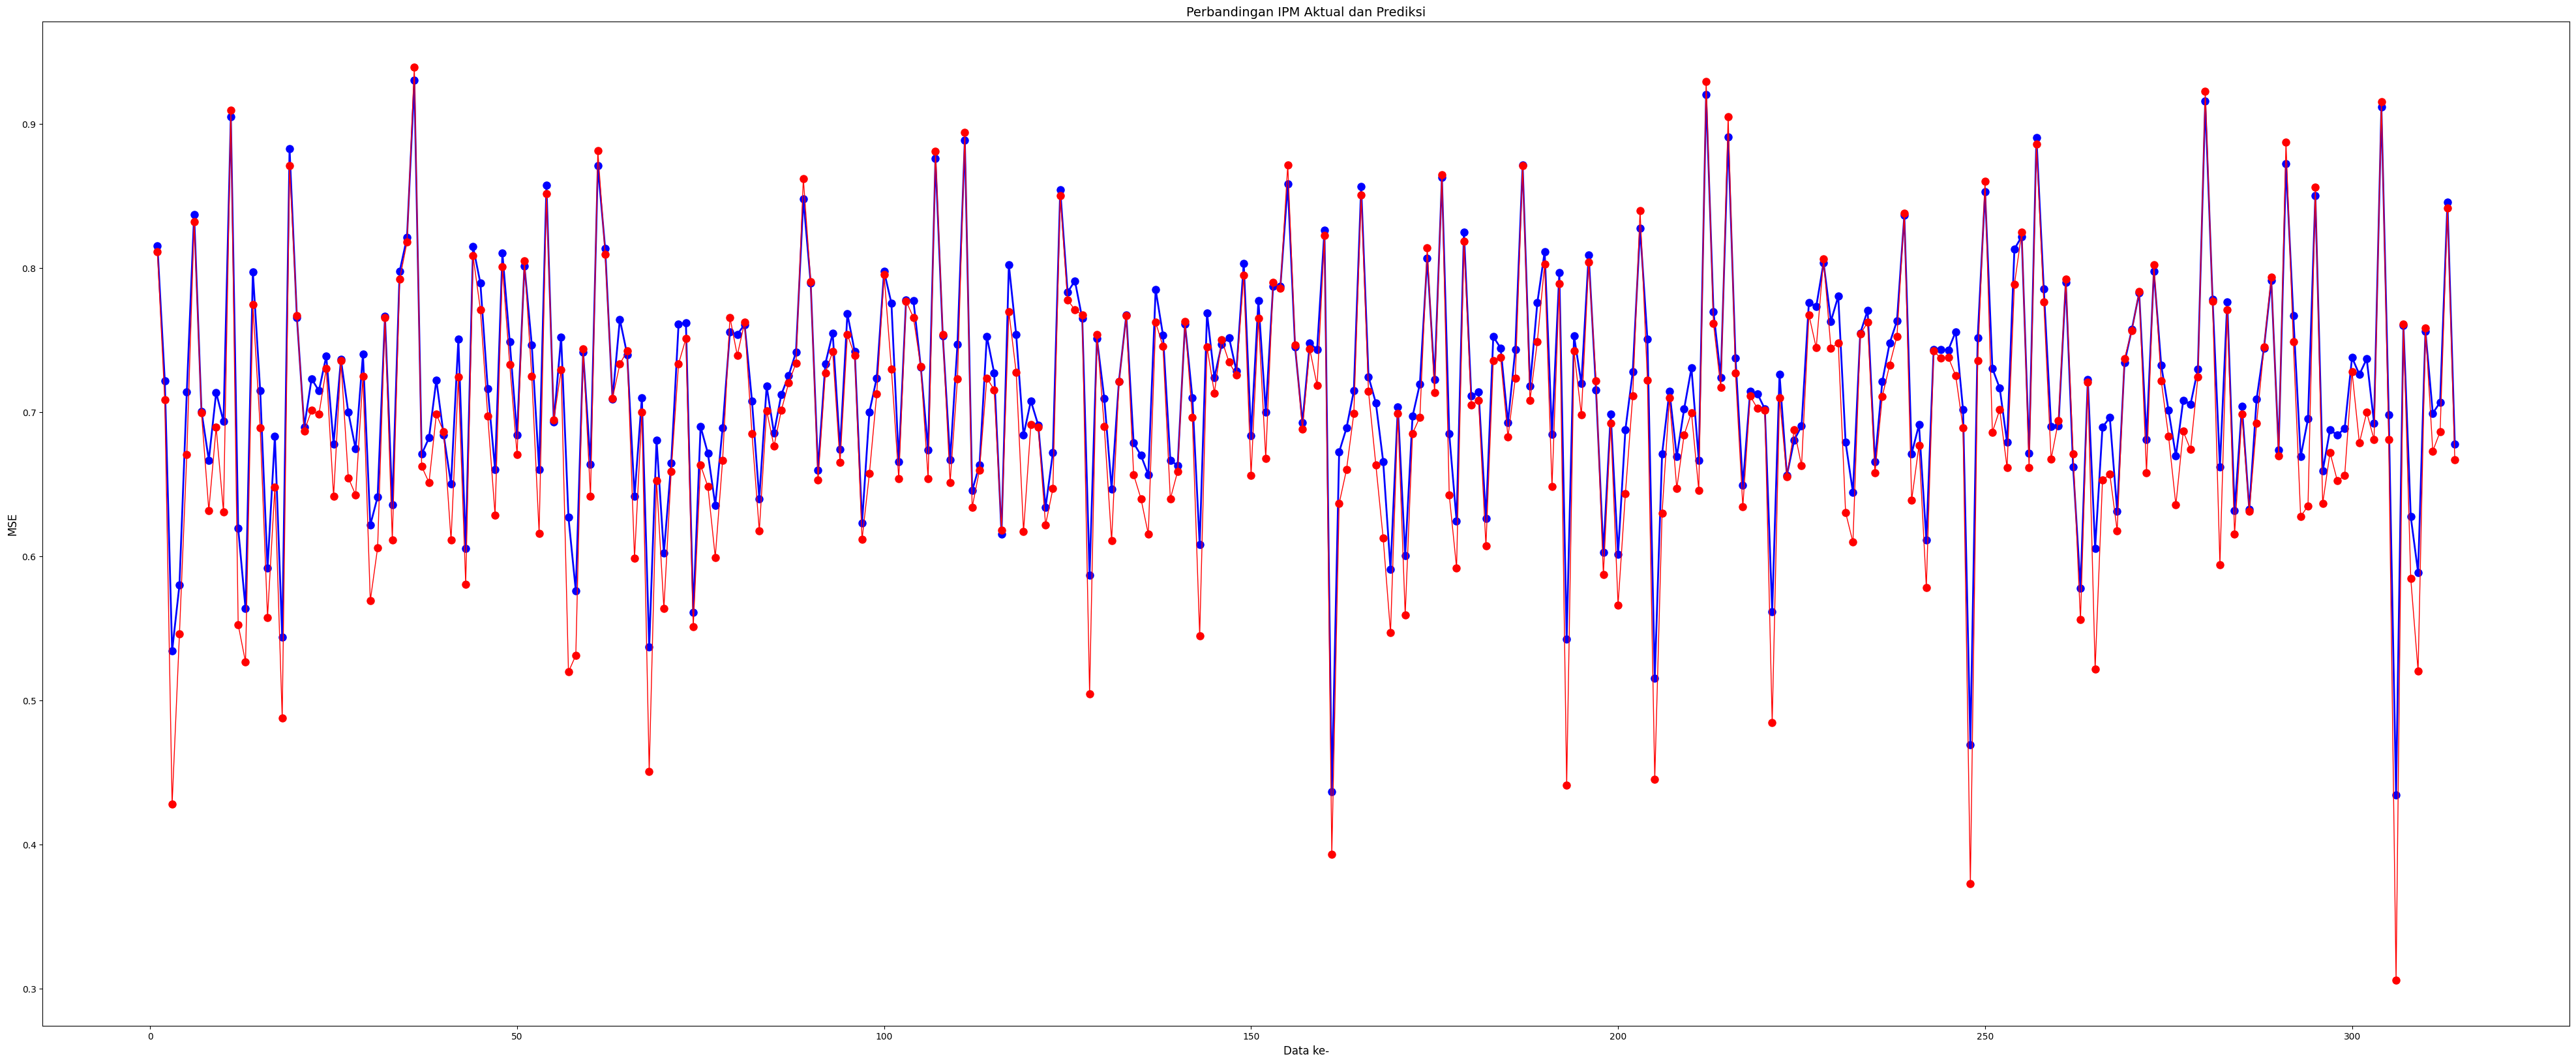

In [35]:
datake = list(range(1, int(len(y_test)/2) + 1))
plt.figure(figsize=(50, 20))
plt.plot(datake, prediksi[:314], label="ipm prediksi", color='blue', linewidth=2, marker='o', markersize=8)
plt.plot(datake, y_test[:314], label="ipm aktual", color='red', linewidth=1, marker='o', markersize=8)
plt.title('Perbandingan IPM Aktual dan Prediksi', fontsize=14)
plt.xlabel('Data ke-', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.show()

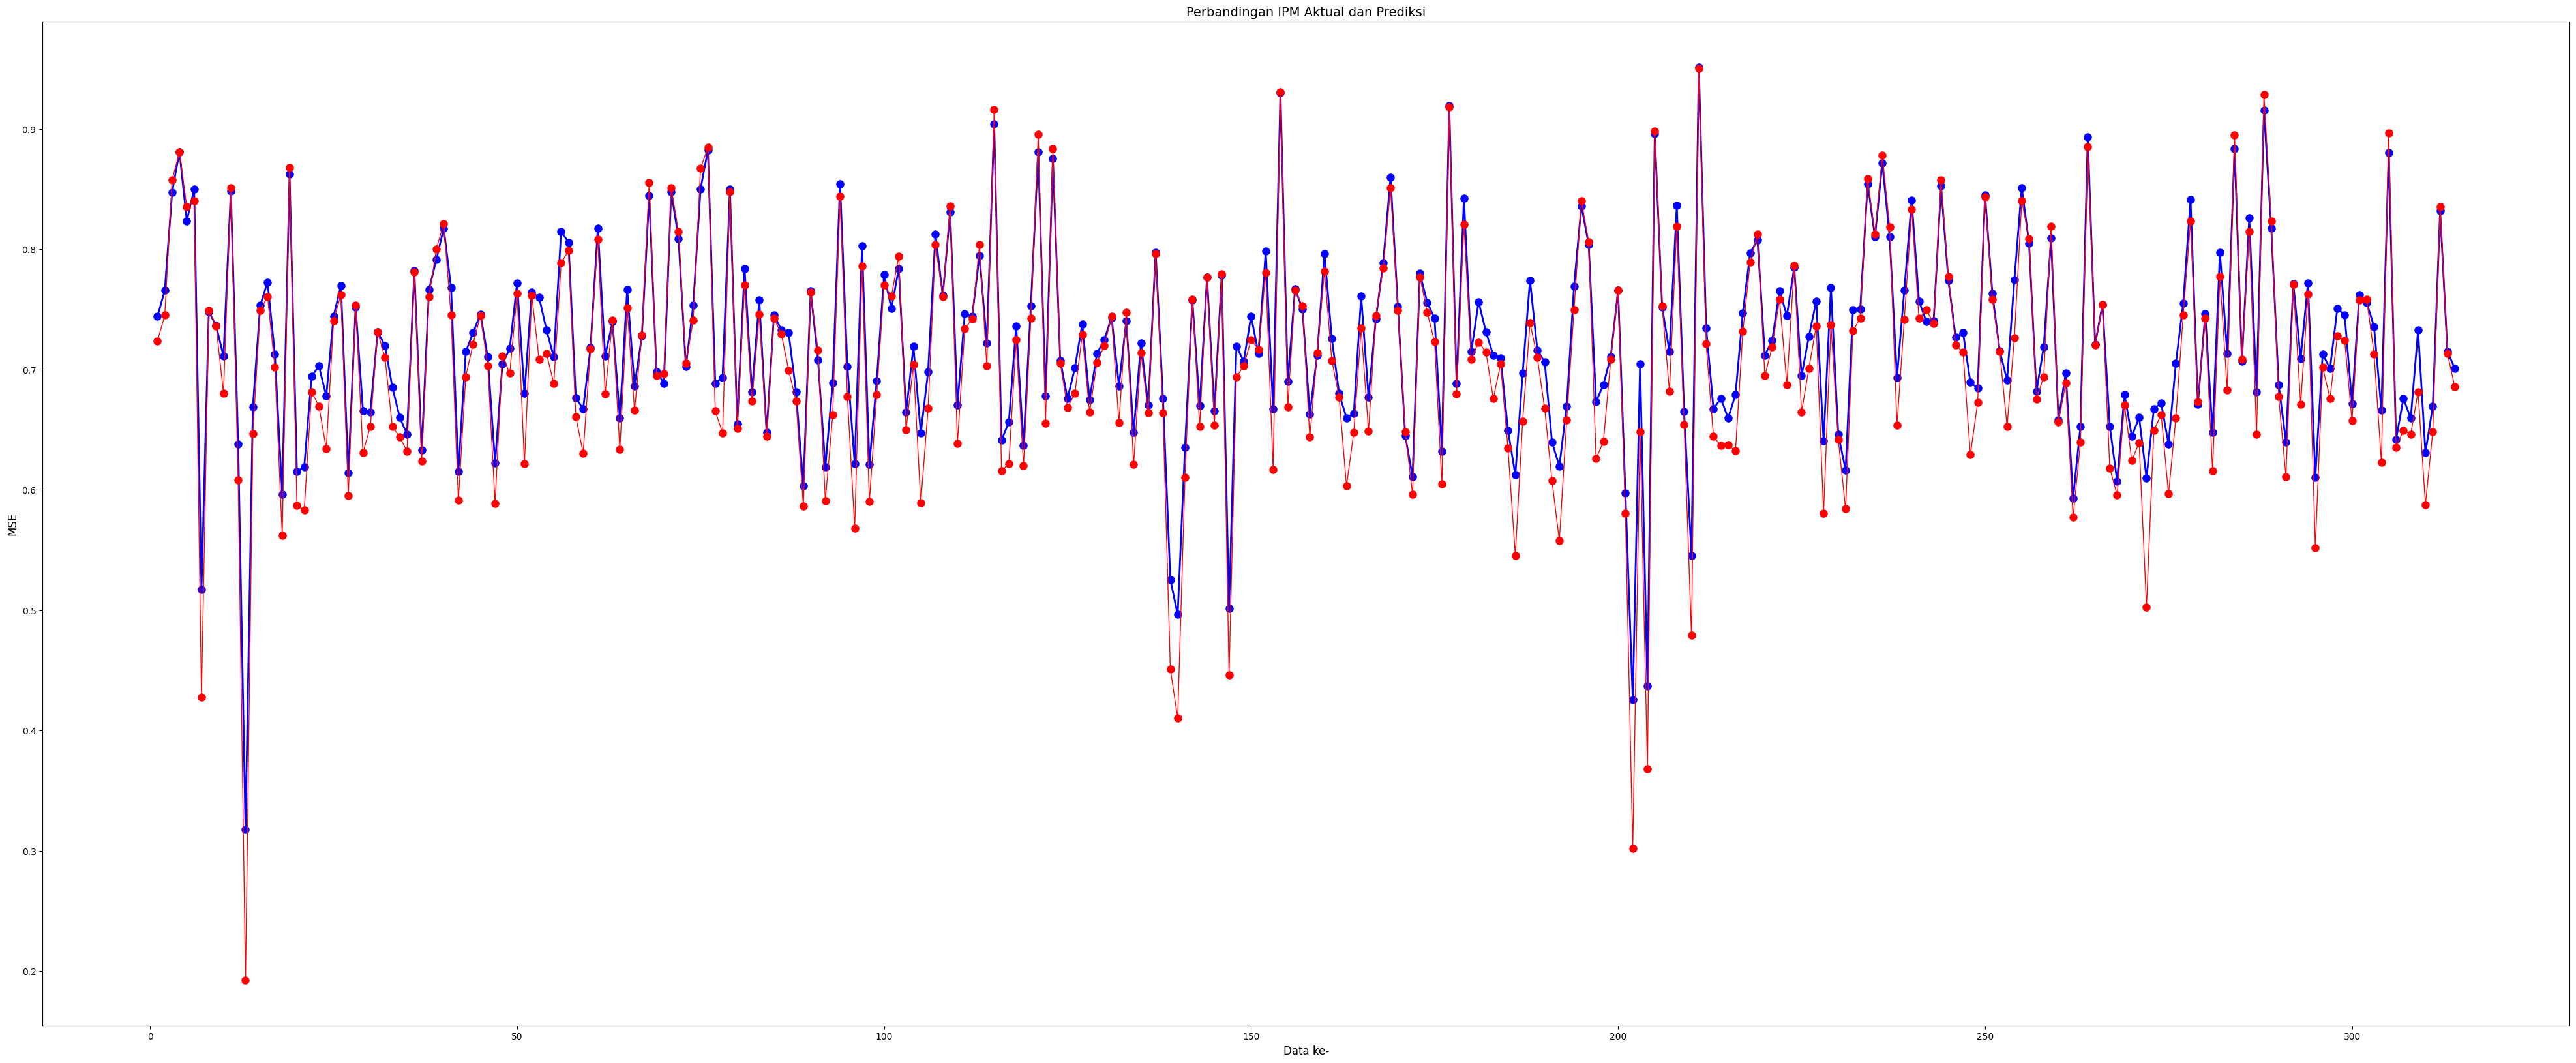

In [36]:
datake = list(range(1, int(len(y_test)/2) + 1))
plt.figure(figsize=(50, 20))
plt.plot(datake, prediksi[314:], label="ipm prediksi", color='blue', linewidth=2, marker='o', markersize=8)
plt.plot(datake, y_test[314:], label="ipm aktual", color='red', linewidth=1, marker='o', markersize=8)
plt.title('Perbandingan IPM Aktual dan Prediksi', fontsize=14)
plt.xlabel('Data ke-', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.show()

In [20]:
for i in range(len(y_test)):
    print(f"Aktual: {y_test[i][0]} - Prediksi: {prediksi[i]}")

Aktual: 0.8115351004951937 - Prediksi: 0.8152116781036678
Aktual: 0.7084182930381591 - Prediksi: 0.7219016081566806
Aktual: 0.4280512671133119 - Prediksi: 0.5343552537300607
Aktual: 0.546315176230702 - Prediksi: 0.5801574657868299
Aktual: 0.670404893678998 - Prediksi: 0.7138445082560211
Aktual: 0.8323623652781823 - Prediksi: 0.8372374437242628
Aktual: 0.6996795805418001 - Prediksi: 0.7006285296897938
Aktual: 0.6318089134867463 - Prediksi: 0.6667626045197125
Aktual: 0.6894844159627147 - Prediksi: 0.7136217786521616
Aktual: 0.6307893970288377 - Prediksi: 0.6935900641945345
Aktual: 0.9094086804544133 - Prediksi: 0.9049539653135255
Aktual: 0.5525779201864259 - Prediksi: 0.6193950054676133
Aktual: 0.5266530731138945 - Prediksi: 0.5637344849256831
Aktual: 0.7746868628022138 - Prediksi: 0.797376621908493
Aktual: 0.6893387707544422 - Prediksi: 0.7148980798816233
Aktual: 0.5576755024759685 - Prediksi: 0.5916856659871313
Aktual: 0.6479755316050102 - Prediksi: 0.6832871275538782
Aktual: 0.4876201